## Análise dos dados

Criando para efetuar análise dos dados, gerando gráficos para mostrar a distribuição dos dados.

In [1]:
import pandas as pd
import numpy as np
import itertools
import re

from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from string import ascii_lowercase

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
random_state = 47
np.random.seed(seed=random_state)

In [3]:
file_name = './../data-sets/dmoz.csv'
df = pd.read_csv(file_name, header=None, names=['url', 'category'])

print('Total data set: ', len(df))

df = df.dropna()

print('Total data set without empty samples: ', len(df))

df.head()

Total data set:  1562978
Total data set without empty samples:  1562975


,url,category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult


In [4]:
dict_cat = {
    'Adult': 0,
    'Arts': 1,
    'Business': 2,
    'Computers': 3,
    'Games': 4,
    'Health': 5,
    'Home': 6,
    'Kids': 7,
    'News': 8,
    'Recreation': 9,
    'Reference': 10,
    'Science': 11,
    'Shopping': 12,
    'Society': 13,
    'Sports': 14
}


dict_cat_desc = {
    0: 'Adult',
    1: 'Arts',
    2: 'Business',
    3: 'Computers',
    4: 'Games',
    5: 'Health',
    6: 'Home',
    7: 'Kids',
    8: 'News',
    9: 'Recreation',
    10: 'Reference',
    11: 'Science',
    12: 'Shopping',
    13: 'Society',
    14: 'Sports'
}

def to_category_desc(item):
    return dict_cat_desc[item]

def to_category_id(item):
    return dict_cat[item]

In [5]:
df['cat_id'] = df['category'].apply(to_category_id)
df.head()

,url,category,cat_id
1,http://www.liquidgeneration.com/,Adult,0
2,http://www.onlineanime.org/,Adult,0
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult,0
4,http://www.galeon.com/kmh/,Adult,0
5,http://www.fanworkrecs.com/,Adult,0


In [6]:
def remove_special_char(item):
    return re.sub(r'\W+', '', item)


regex_replace_http = r'(www[0-9][.])'
def replace_http(item):
    item_r = item.replace('http://', '').replace('https://', '').replace('www.', '')
    return re.sub(regex_replace_http, '', item_r)

def only_char(item):
    return re.sub('[^A-Za-z]+', '', item)

df['n_url'] = df['url'].apply(replace_http)
df['url_text'] = df['n_url'].apply(only_char)

In [7]:
df = df.dropna()

In [8]:
X = df['url_text']
Y = df['cat_id']

In [9]:
count_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3,3)).fit(X)
print('Length of vocabulary: ', len(count_vectorizer.vocabulary_))
urls_tf = count_vectorizer.transform(X)

print('TF shape: ', urls_tf.shape)

Length of vocabulary:  17411
TF shape:  (1562975, 17411)


In [10]:
print('\n======================================')
print('DATA SET SHAPE: ',  urls_tf.shape)
print('DATA SET SAMPLE: ', urls_tf[0])

print('Data set sample features: ')
for i in urls_tf[0].nonzero()[1]:
    print('pos: ', i)
    print(urls_tf[0].toarray()[0][i])
    print('feature: ', count_vectorizer.get_feature_names()[i])
print('======================================\n')


DATA SET SHAPE:  (1562975, 17411)
DATA SET SAMPLE:    (0, 502)	1
  (0, 1727)	1
  (0, 2186)	1
  (0, 3041)	1
  (0, 3141)	1
  (0, 4162)	1
  (0, 5476)	1
  (0, 5769)	1
  (0, 5828)	1
  (0, 7623)	1
  (0, 8816)	1
  (0, 8871)	1
  (0, 9765)	1
  (0, 11279)	1
  (0, 11424)	1
  (0, 12977)	1
  (0, 13642)	1
Data set sample features: 
pos:  502
1
feature:  ati
pos:  1727
1
feature:  com
pos:  2186
1
feature:  dge
pos:  3041
1
feature:  ene
pos:  3141
1
feature:  era
pos:  4162
1
feature:  gen
pos:  5476
1
feature:  idg
pos:  5769
1
feature:  ion
pos:  5828
1
feature:  iqu
pos:  7623
1
feature:  liq
pos:  8816
1
feature:  nco
pos:  8871
1
feature:  ner
pos:  9765
1
feature:  onc
pos:  11279
1
feature:  qui
pos:  11424
1
feature:  rat
pos:  12977
1
feature:  tio
pos:  13642
1
feature:  uid



In [11]:
url_train, url_test, label_train, label_test = train_test_split(urls_tf, Y, test_size=0.3, random_state=random_state)

In [12]:
urls_tf,Y,X = None,None,None
words_vector = None, 

In [13]:
df_train = pd.DataFrame(data=label_train[0:600000])
df_train.head()

,cat_id
1468578,14
1555127,14
405687,2
796213,7
1184415,12


In [14]:
len(df_train)

600000

In [15]:
df_test = pd.DataFrame(data=label_test)
df_test.head()

,cat_id
169763,1
130043,1
696992,4
612813,3
970985,10


In [16]:
len(df_test)

468893

In [17]:
df = df_train.append(df_test)
df.head()

,cat_id
1468578,14
1555127,14
405687,2
796213,7
1184415,12


In [18]:
len(df)
#1068893

1068893

In [19]:
df['category'] = df['cat_id'].apply(to_category_desc)
df.head()

,cat_id,category
1468578,14,Sports
1555127,14,Sports
405687,2,Business
796213,7,Kids
1184415,12,Shopping


In [20]:
pd.set_option('display.max_rows', None)
print(df['category'].nunique())
print(len(df))
df.groupby('category').count()

15
1068893


,cat_id
category,
Adult,24246
Arts,173575
Business,164474
Computers,80809
Games,38341
Health,41022
Home,19363
Kids,31552
News,6163


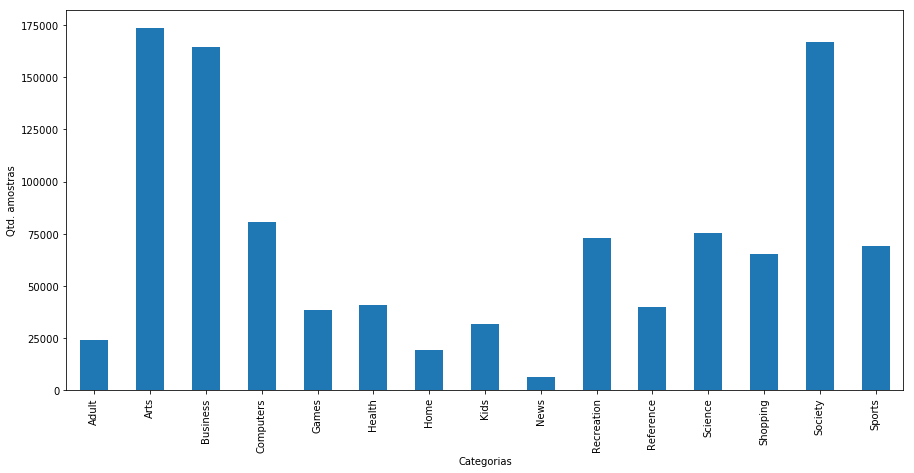

In [22]:
plt.figure(1,figsize=(15,7))
df_plot = df.groupby('category')['category'].count()
df_plot.index.name = 'Categorias'
plt.ylabel('Qtd. amostras')
df_plot.plot.bar()
#plt.savefig('./data_set_1.png')